In [111]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
 
set_matplotlib_formats ('png')

/tmp/ipykernel_38028/4294946217.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats ('png')


In [112]:
eps = 0.01
x0 = 1
y0 = 10
a0 = 0.0001
Tk = 1500
tau = 0.01

In [113]:
#     0,1,2
# u - x,y,a
def f (u):
    res = np.array([u[0] * (1 - 0.5*u[0] - 2 * u[1] / (7*u[2] ** 2)),
                    u[1] * (2*u[2] - 3.5*u[2] ** 2 * u[0] - 0.5*u[1]),
                    eps  * (2 - 7*u[2]*u[0])])
    return res

def jacobian (u):
    res = [
        [1 - 0.5*u[0] - 2 * u[1] / (7*u[2] ** 2) - 0.5 * u[0], 
         - 2 * u[0] / (7*u[2] ** 2),
         4 * u[0] * u[1] / (7 * u[2] ** 3)],
        [-3.5 * u[1] * u[2] ** 2,
         (2*u[2] - 3.5*u[2] ** 2 * u[0] - 0.5*u[1]) - 0.5 * u[1],
         u[1] * (2 - 7 * u[2] * u[0])],
        [eps * (-7 * u[2]),
         0,
         eps * (-7 * u[0])]
         ]
    return np.array(res)

In [114]:
time = [0]
res  = [[x0, y0, a0]]

for t in np.arange(tau, Tk, tau):
    time.append(t)

In [115]:
a = 0.435866521508459
p1 = a; p2 = 0.4782408332745185; p3 = 0.0858926452170225
beta_21 = p1; beta_31 = p1; beta_32 = -2.116053335949811

In [116]:
for i in range(1, len(time)):
    D = np.eye(3) - a * tau * jacobian (res[i-1])
    k1 = np.linalg.solve (D, tau * f(res[i-1]))
    k2 = np.linalg.solve (D, tau * f(res[i-1] + beta_21 * k1))
    k3 = np.linalg.solve (D, tau * f(res[i-1] + beta_31 * k1 + beta_32 * k2))
    y = res[i-1] + p1 * k1 + p2 * k2 + p3 * k3
    res.append(y)

res = np.array(res)

In [117]:
x_res = res.T[0]
y_res = res.T[1]
a_res = res.T[2]

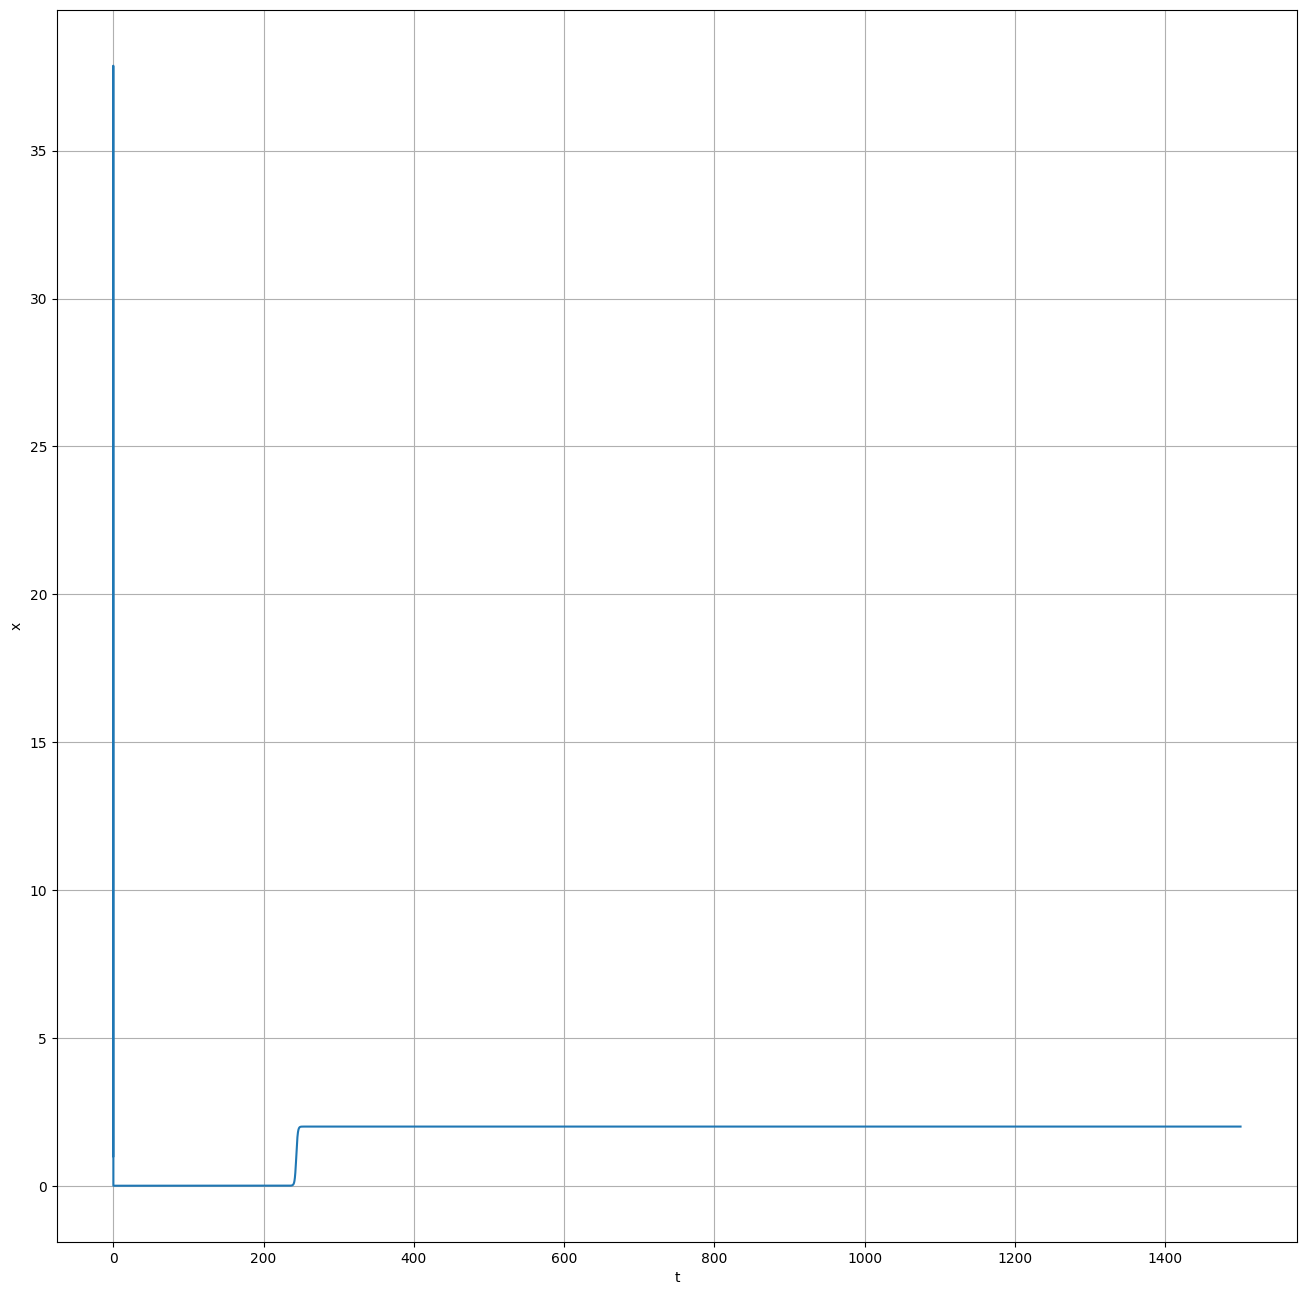

In [118]:
plt.figure(figsize=(16,16))
ax1 = plt.axes()

ax1.set_xlabel("t")
ax1.set_ylabel("x")
ax1.plot(time, x_res)

plt.grid()
plt.savefig("picturies/graph1.png", dpi=100)
plt.show()

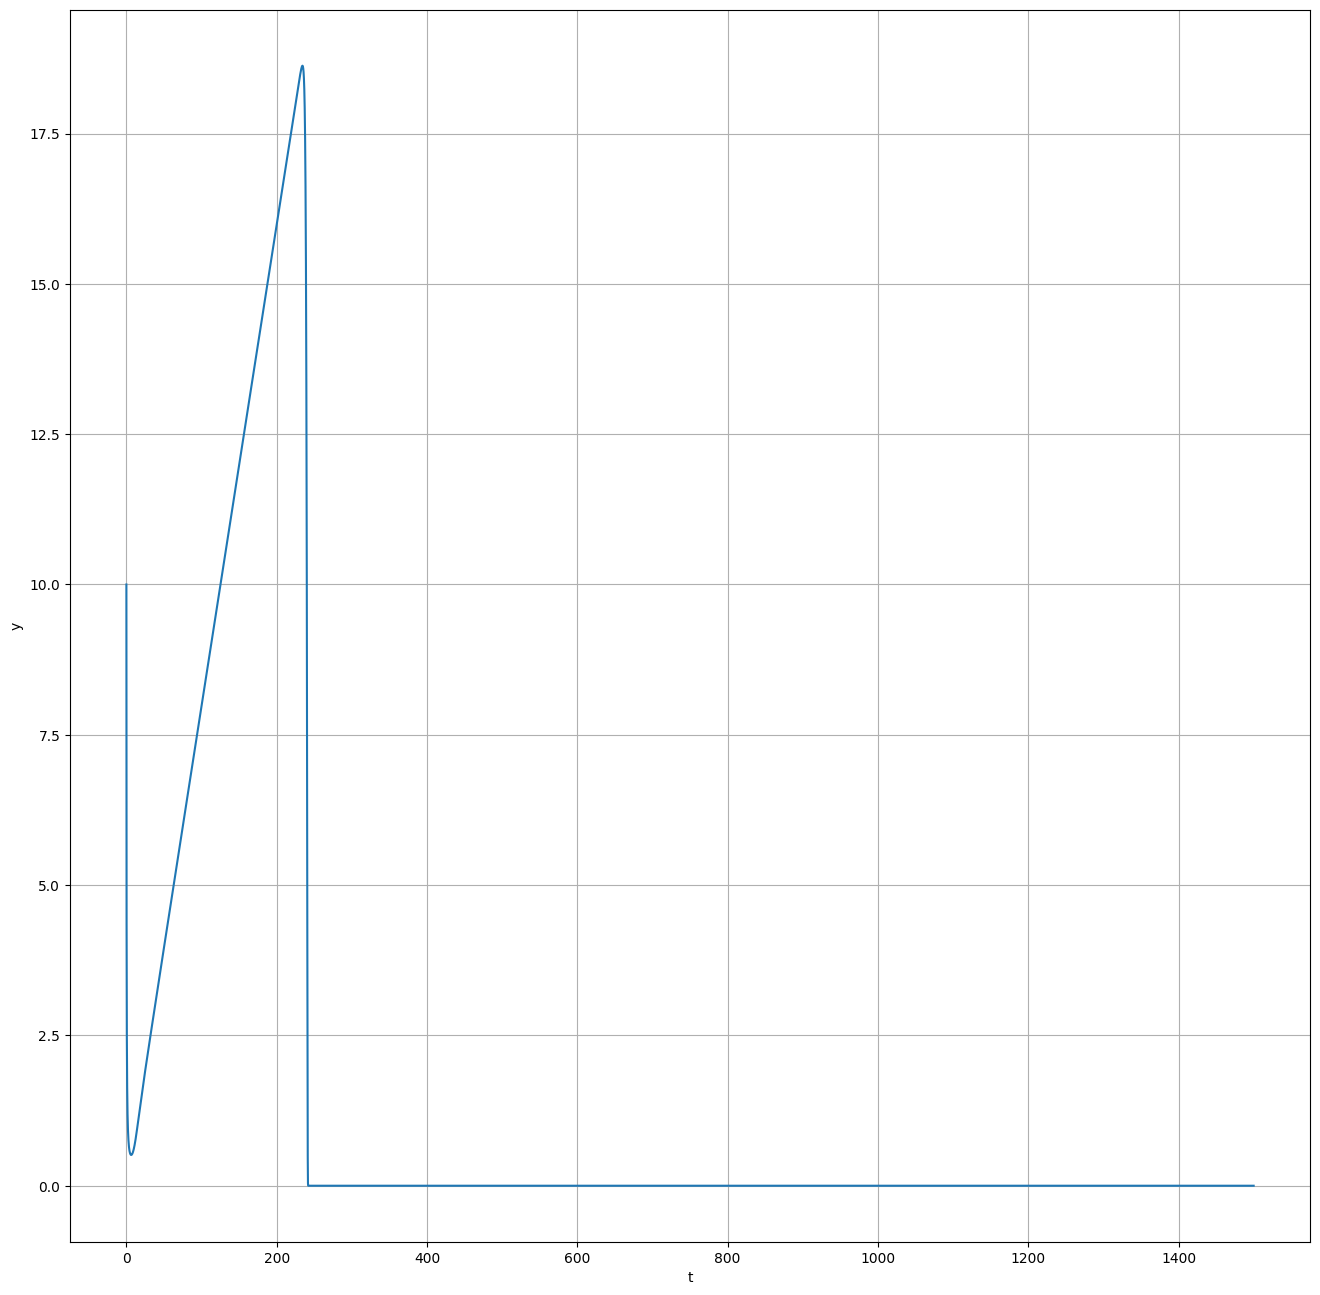

In [119]:
plt.figure(figsize=(16,16))
ax1 = plt.axes()

ax1.set_xlabel("t")
ax1.set_ylabel("y")
ax1.plot(time, y_res)

plt.grid()
plt.savefig("picturies/graph2.png", dpi=100)
plt.show()

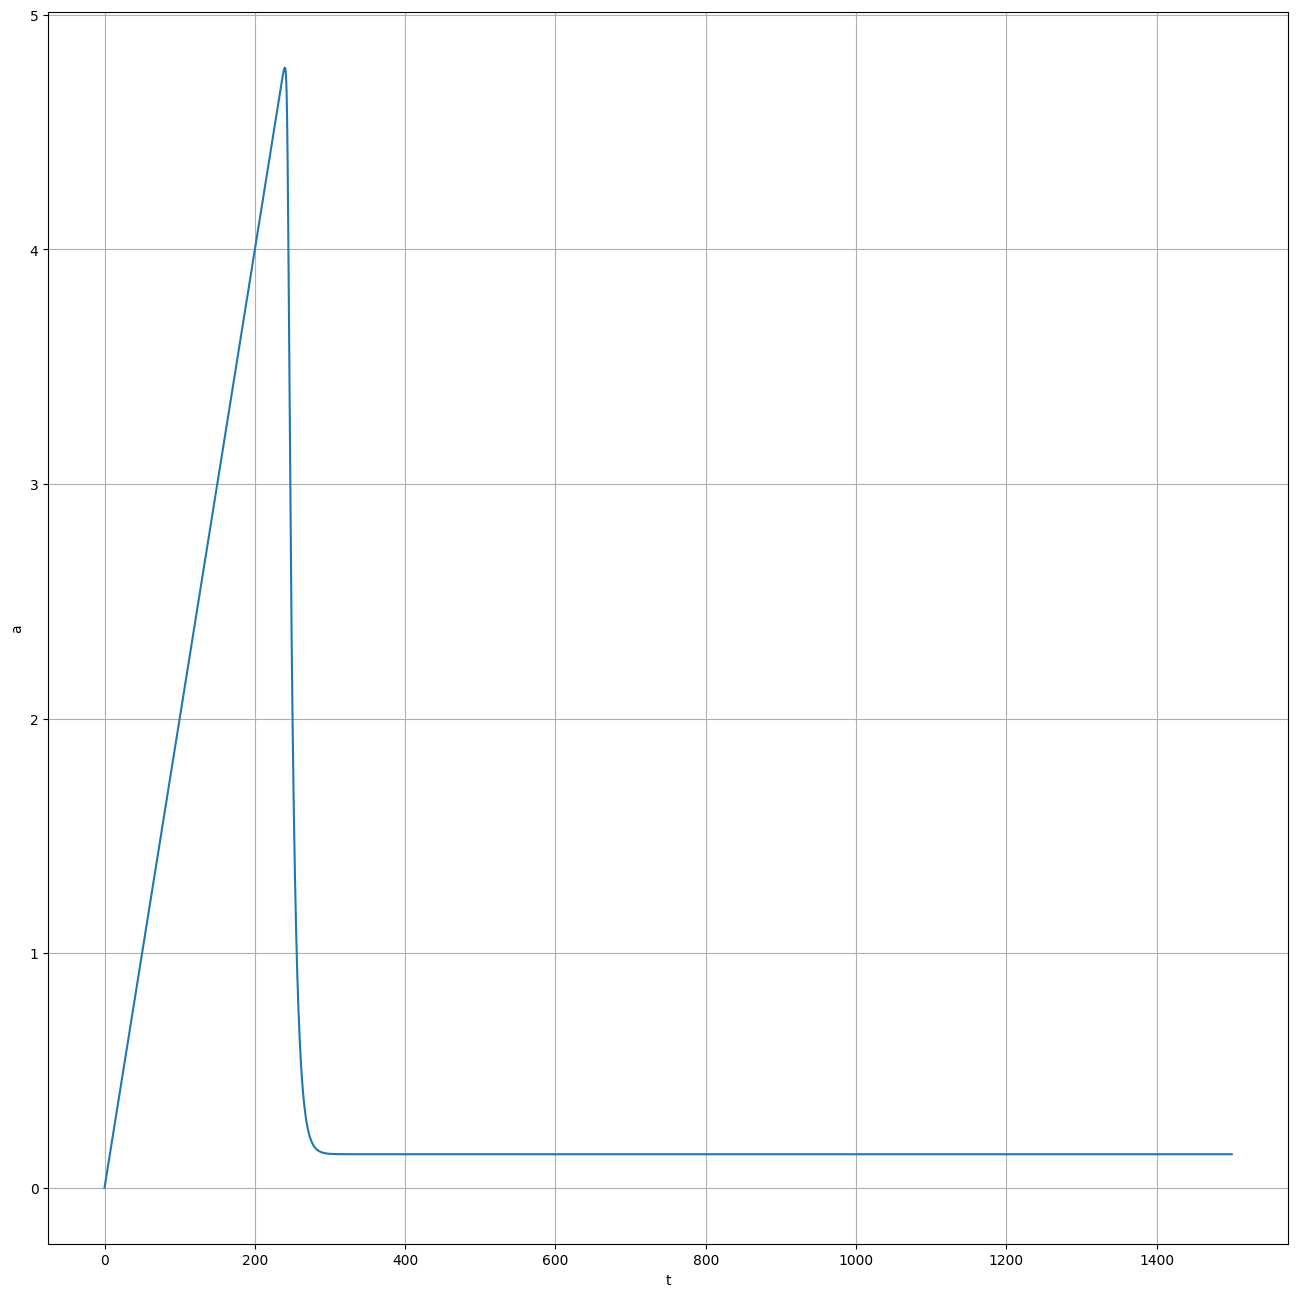

In [120]:
plt.figure(figsize=(16,16))
ax1 = plt.axes()

ax1.set_xlabel("t")
ax1.set_ylabel("a")
ax1.plot(time, a_res)

plt.grid()
plt.savefig("picturies/graph3.png", dpi=100)
plt.show()